<a href="https://colab.research.google.com/github/padolekrushna/projects-on-python/blob/main/supervised_regression_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

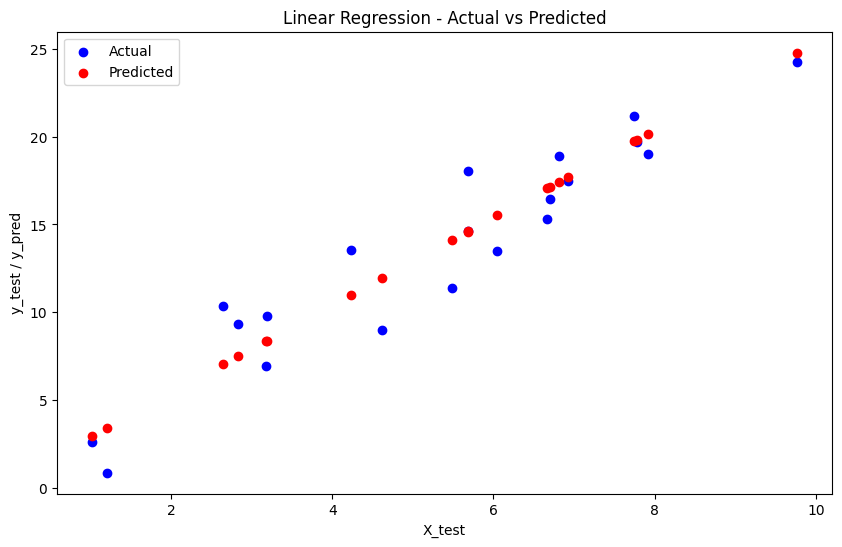

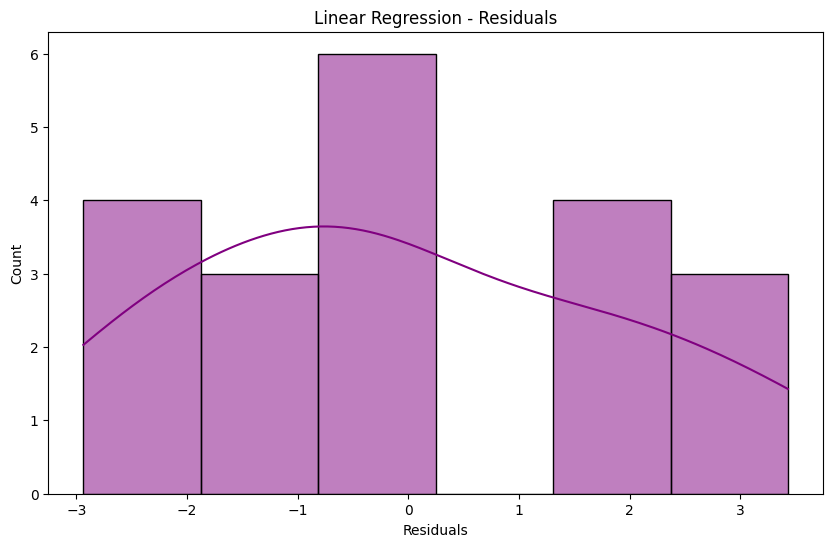

Best Parameters for Ridge Regression: {'alpha': 0.1}


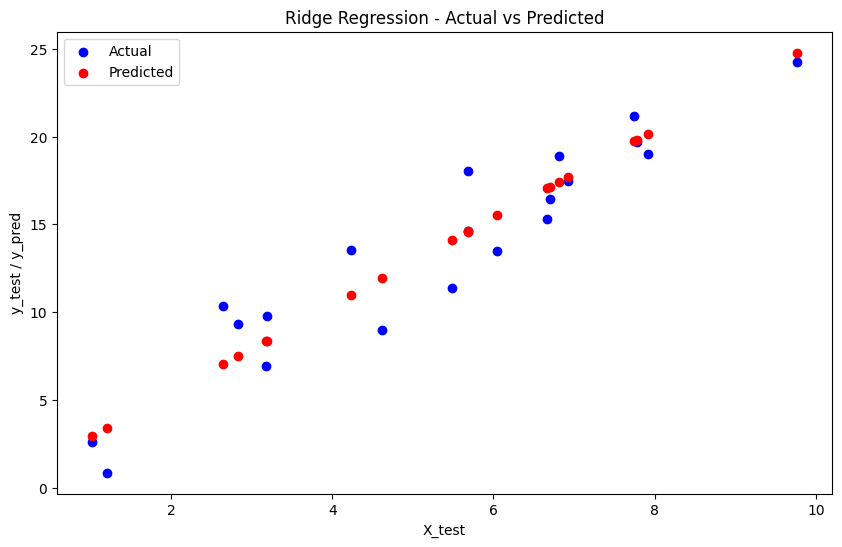

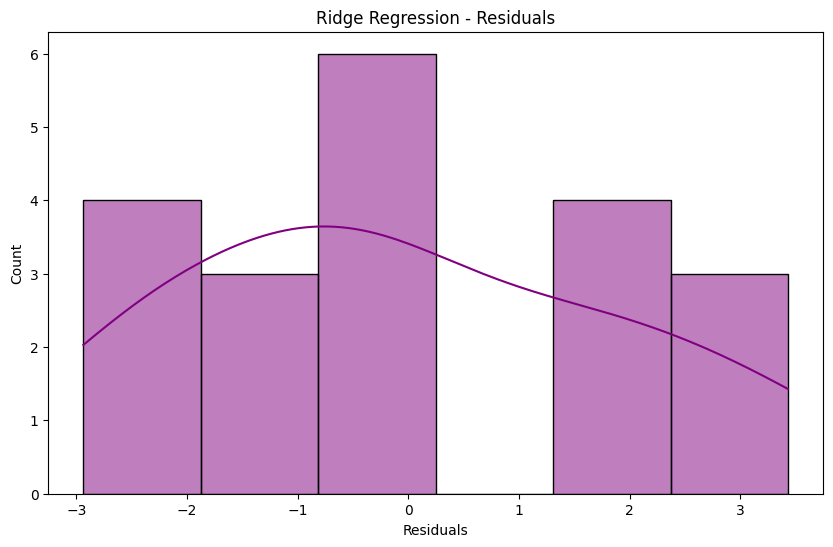

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

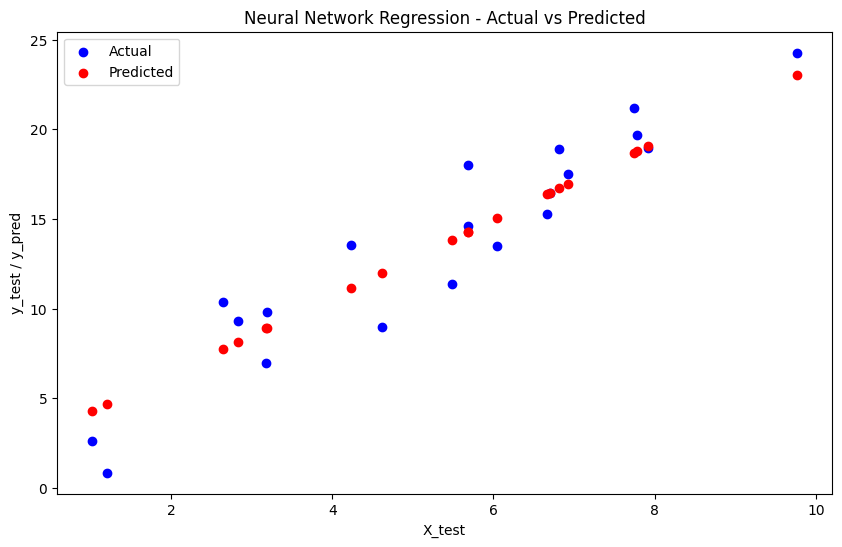

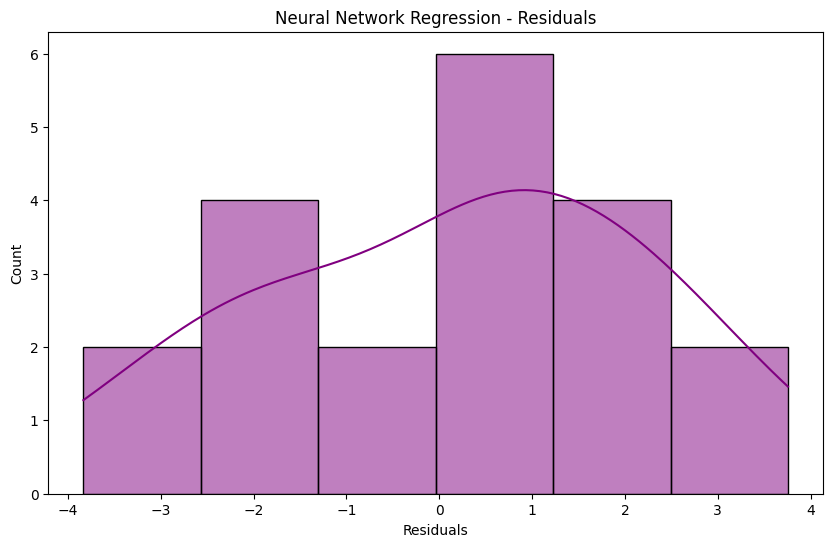

Best Parameters for Lasso Regression: {'alpha': 0.01}


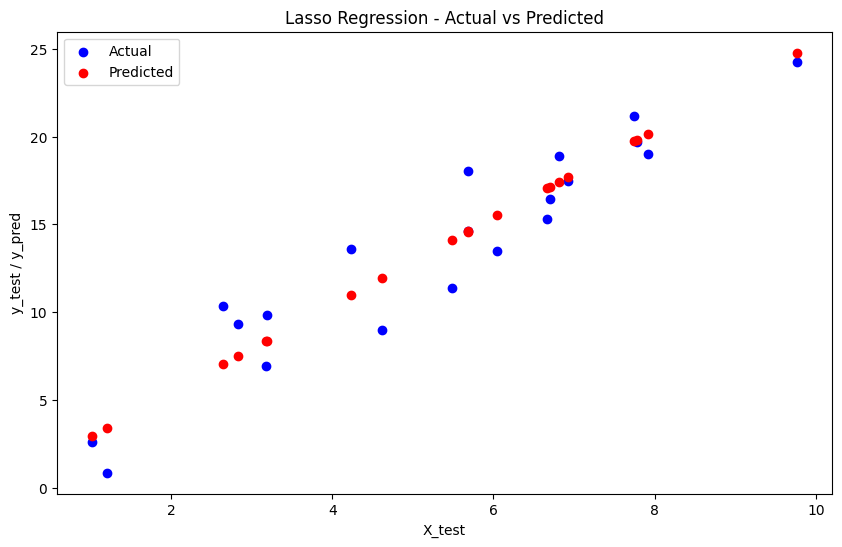

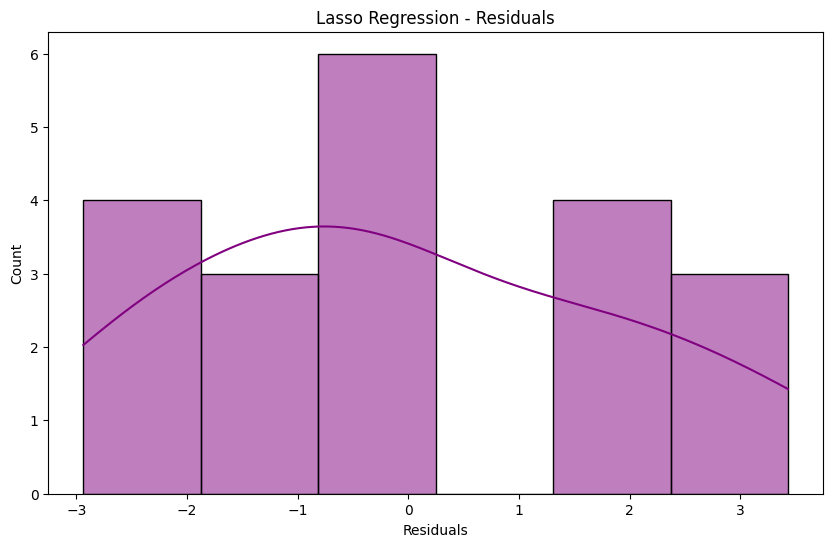

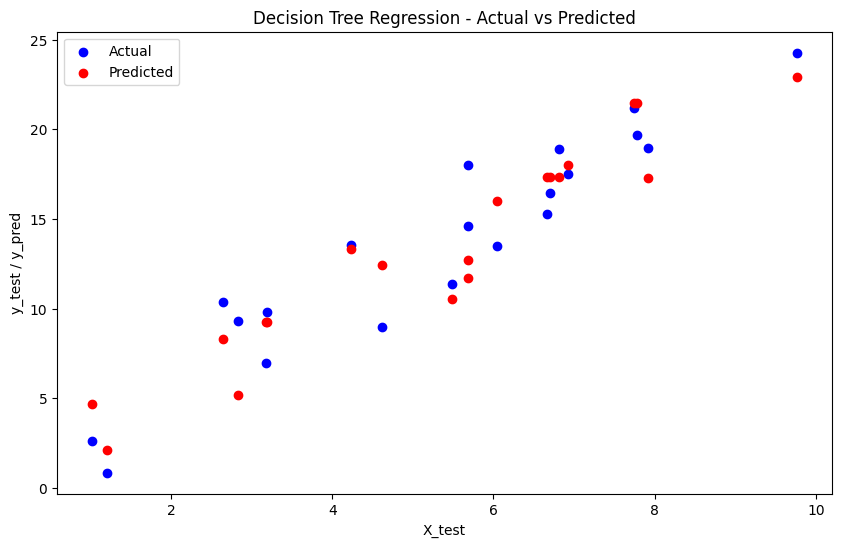

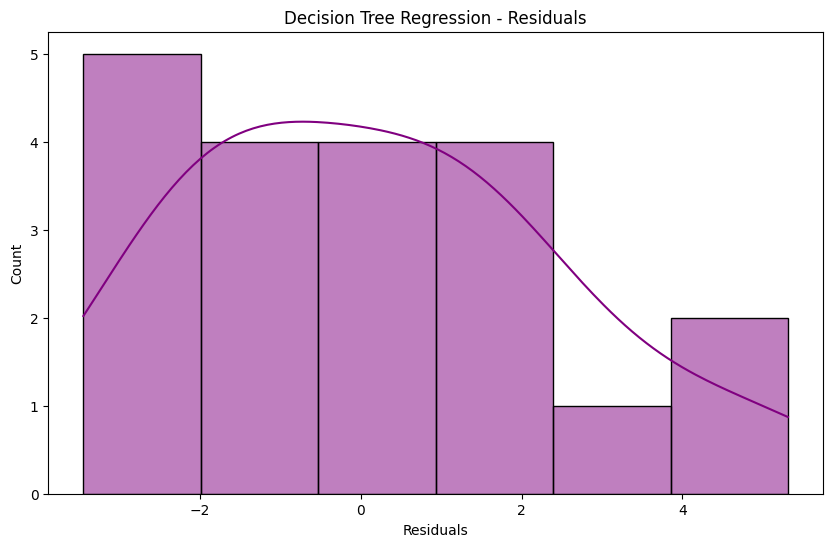

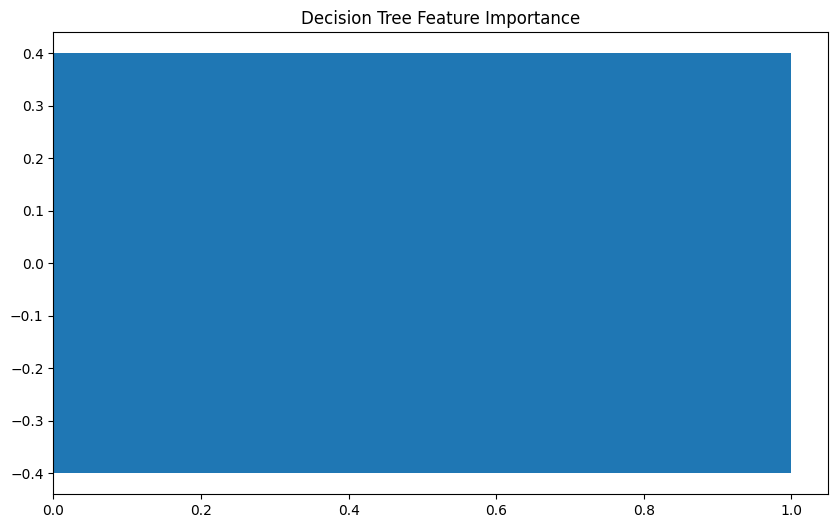

Best Parameters for Random Forest Regression: {'n_estimators': 200}


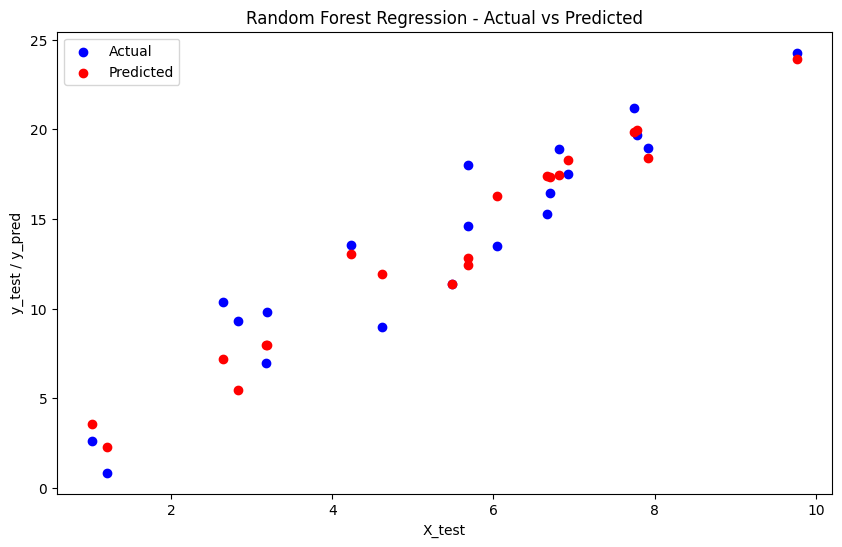

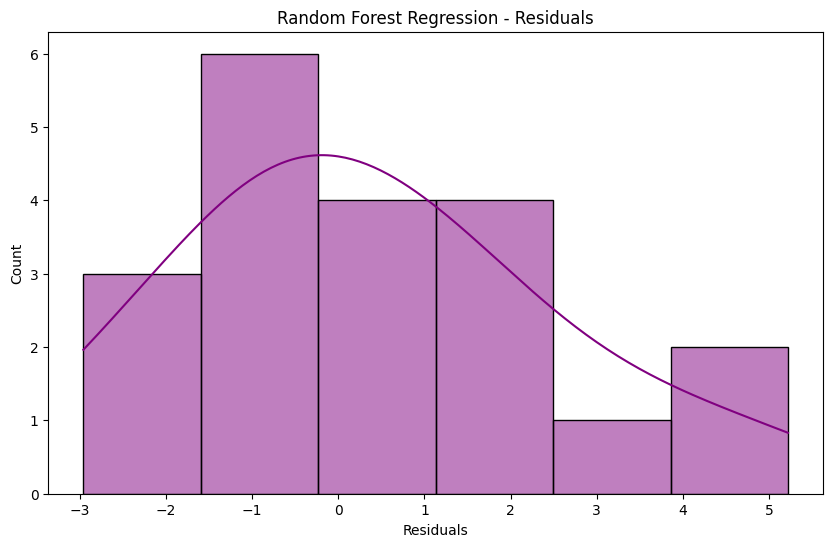

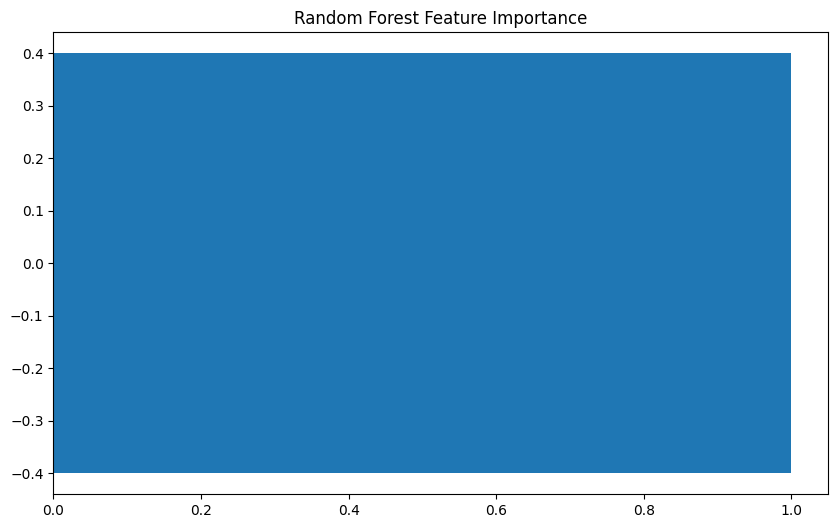

Best Parameters for KNN Regression: {'n_neighbors': 7}


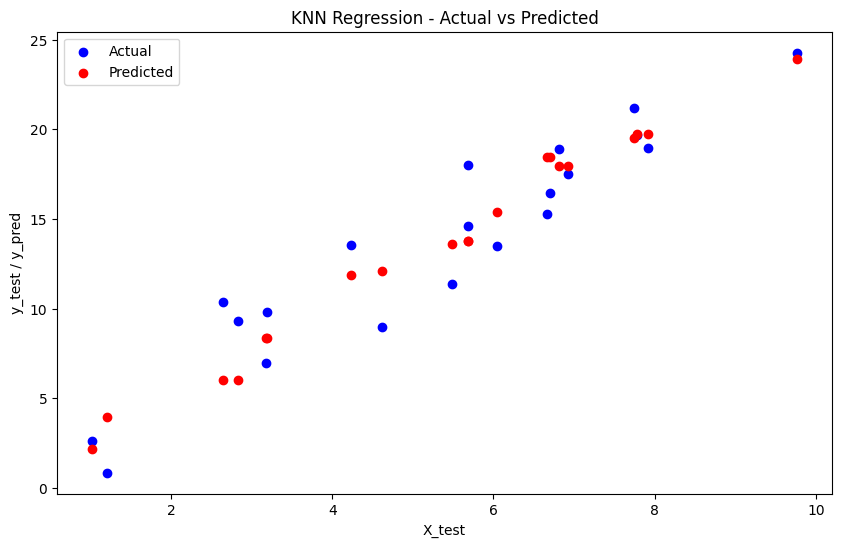

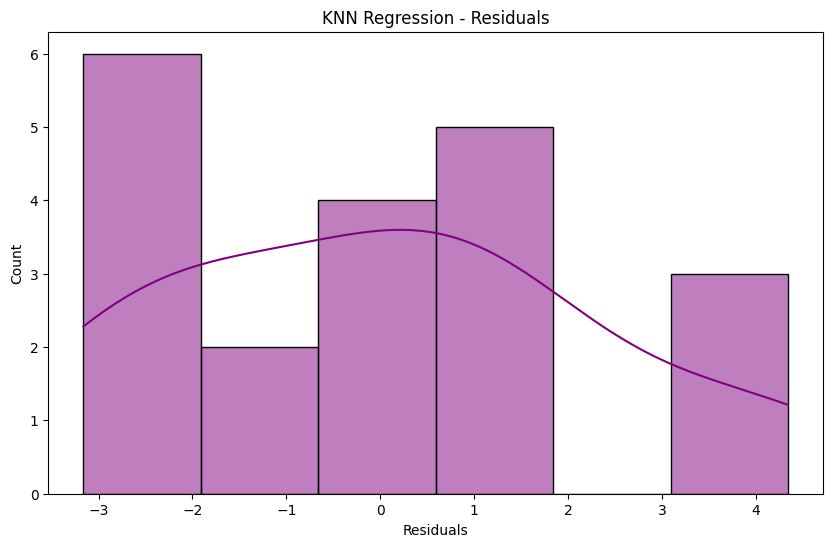

Best Parameters for SVM Regression: {'C': 10.0}


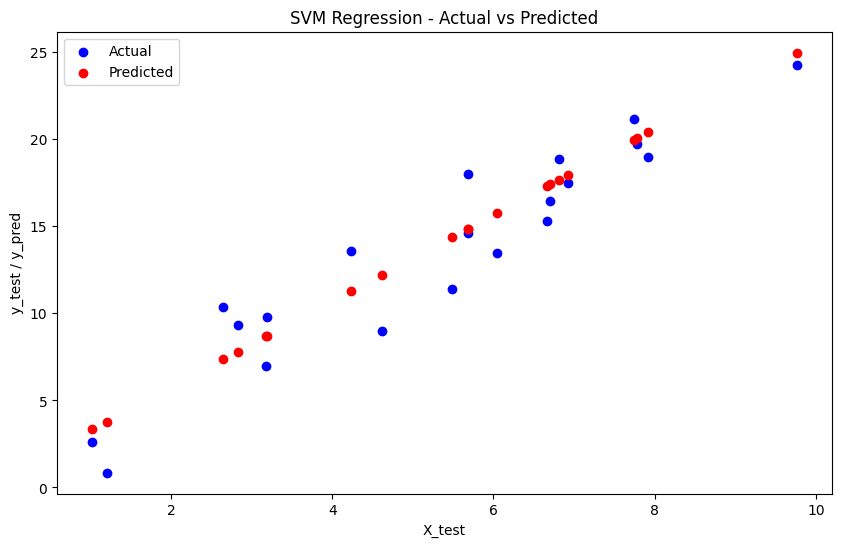

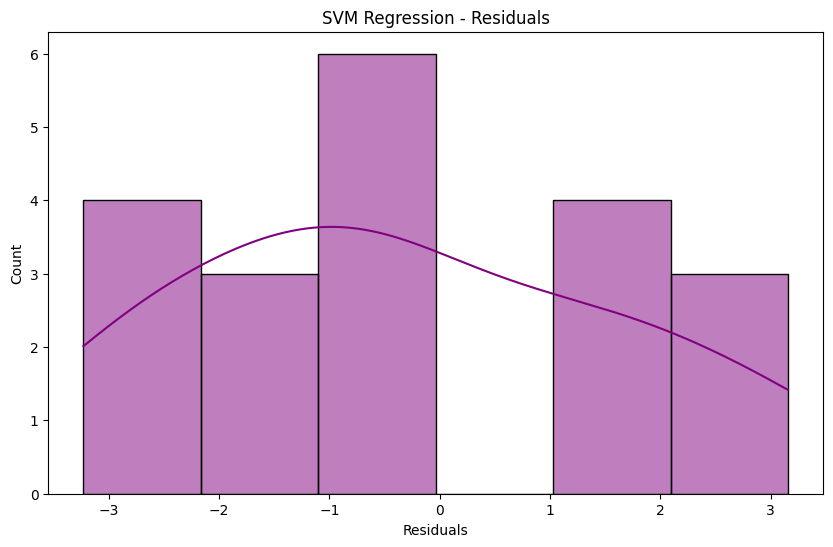

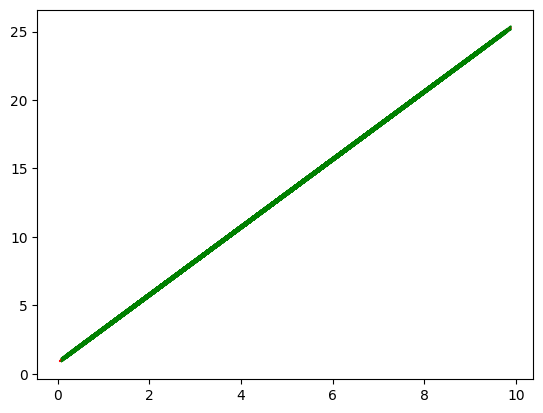

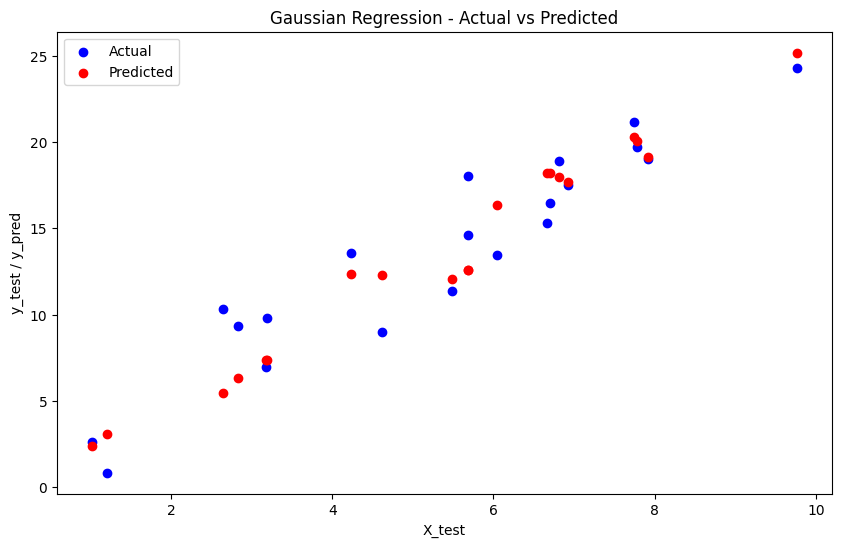

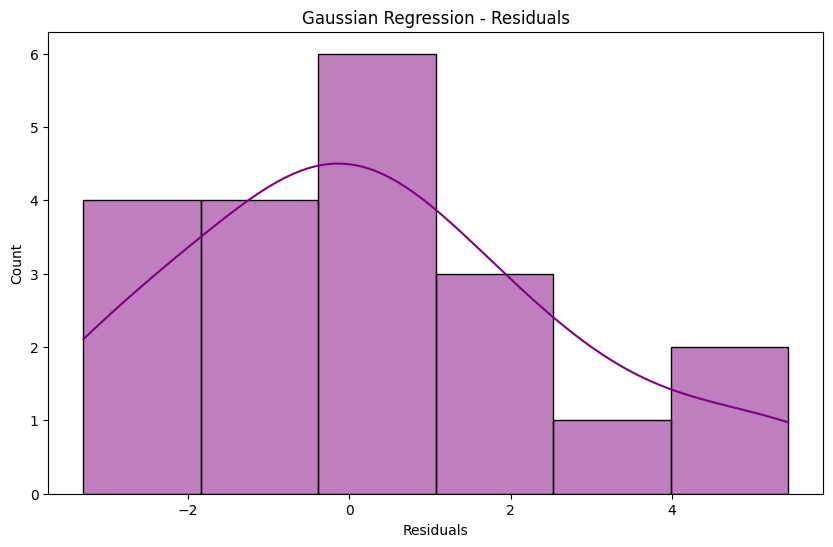

                                MSE        R2  Adjusted R2       MAE  \
Linear Regression          3.671013  0.896480     0.890729  1.602911   
Ridge Regression           3.670756  0.896488     0.890737  1.602734   
Neural Network Regression  4.129553  0.883550     0.877081  1.712087   
Lasso Regression           3.670195  0.896504     0.890754  1.602343   
Decision Tree Regression   5.196749  0.853456     0.845315  1.885427   
Random Forest Regression   4.576196  0.870955     0.863786  1.685603   
KNN Regression             5.113643  0.855800     0.847788  1.875027   
SVM Regression             3.765015  0.893830     0.887931  1.676032   
Gaussian Regression        5.648871  0.840707     0.831857  1.838060   

                           Cross-Val MSE  Cross-Val R2  
Linear Regression               4.357236      0.922149  
Ridge Regression                4.356947      0.922157  
Neural Network Regression       5.259238      0.908445  
Lasso Regression                4.356605      0.922

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Create a demo dataset (random regression dataset)
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # Features
y = 2.5 * X.squeeze() + np.random.randn(100) * 2  # Target with noise

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize results dictionary
results = {}

# Define function to fit, predict and evaluate models with visualization and cross-validation
def evaluate_and_visualize(model, X_train, X_test, y_train, y_test, model_name):
    # Perform K-Fold Cross Validation
    kf = KFold(n_splits=5, random_state=42, shuffle=True)
    mse_scores = []
    r2_scores = []

    for train_idx, val_idx in kf.split(X_train):
        X_kf_train, X_kf_val = X_train[train_idx], X_train[val_idx]
        y_kf_train, y_kf_val = y_train[train_idx], y_train[val_idx]
        model.fit(X_kf_train, y_kf_train)
        y_kf_pred = model.predict(X_kf_val)
        mse_scores.append(mean_squared_error(y_kf_val, y_kf_pred))
        r2_scores.append(r2_score(y_kf_val, y_kf_pred))

    # Evaluate on test data
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

    results[model_name] = {
        "MSE": mse,
        "R2": r2,
        "Adjusted R2": adjusted_r2,
        "MAE": mae,
        "Cross-Val MSE": np.mean(mse_scores),
        "Cross-Val R2": np.mean(r2_scores)
    }

    # Plot Actual vs Predicted
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test, y_test, color='blue', label='Actual')
    plt.scatter(X_test, y_pred, color='red', label='Predicted')
    plt.title(f'{model_name} - Actual vs Predicted')
    plt.xlabel('X_test')
    plt.ylabel('y_test / y_pred')
    plt.legend()
    plt.show()

    # Plot Residuals
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True, color='purple')
    plt.title(f'{model_name} - Residuals')
    plt.xlabel('Residuals')
    plt.show()

# Function for hyperparameter tuning using GridSearchCV
def hyperparameter_tuning(model, param_grid, X_train, y_train, model_name):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
    return grid_search.best_estimator_

# Apply all regression algorithms

# 1. Linear Regression
linear_model = LinearRegression()
evaluate_and_visualize(linear_model, X_train, X_test, y_train, y_test, "Linear Regression")

# 2. Ridge Regression with GridSearchCV for tuning alpha
ridge_model = hyperparameter_tuning(Ridge(), {'alpha': [0.1, 1.0, 10.0]}, X_train, y_train, "Ridge Regression")
evaluate_and_visualize(ridge_model, X_train, X_test, y_train, y_test, "Ridge Regression")

# 3. Neural Network Regression
nn_model = MLPRegressor(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
evaluate_and_visualize(nn_model, X_train, X_test, y_train, y_test, "Neural Network Regression")

# 4. Lasso Regression with GridSearchCV for tuning alpha
lasso_model = hyperparameter_tuning(Lasso(), {'alpha': [0.01, 0.1, 1.0]}, X_train, y_train, "Lasso Regression")
evaluate_and_visualize(lasso_model, X_train, X_test, y_train, y_test, "Lasso Regression")

# 5. Decision Tree Regression
tree_model = DecisionTreeRegressor(random_state=42)
evaluate_and_visualize(tree_model, X_train, X_test, y_train, y_test, "Decision Tree Regression")

# Plot Feature Importance for Decision Tree
plt.figure(figsize=(10, 6))
plt.barh(range(X_train.shape[1]), tree_model.feature_importances_)
plt.title("Decision Tree Feature Importance")
plt.show()

# 6. Random Forest Regression with GridSearchCV for tuning n_estimators
forest_model = hyperparameter_tuning(RandomForestRegressor(random_state=42), {'n_estimators': [50, 100, 200]}, X_train, y_train, "Random Forest Regression")
evaluate_and_visualize(forest_model, X_train, X_test, y_train, y_test, "Random Forest Regression")

# Plot Feature Importance for Random Forest
plt.figure(figsize=(10, 6))
plt.barh(range(X_train.shape[1]), forest_model.feature_importances_)
plt.title("Random Forest Feature Importance")
plt.show()

# 7. KNN Model with GridSearchCV for tuning n_neighbors
knn_model = hyperparameter_tuning(KNeighborsRegressor(), {'n_neighbors': [3, 5, 7]}, X_train, y_train, "KNN Regression")
evaluate_and_visualize(knn_model, X_train, X_test, y_train, y_test, "KNN Regression")

# 8. Support Vector Machines (SVM) with GridSearchCV for tuning C
svm_model = hyperparameter_tuning(SVR(kernel='linear'), {'C': [0.1, 1.0, 10.0]}, X_train, y_train, "SVM Regression")
evaluate_and_visualize(svm_model, X_train, X_test, y_train, y_test, "SVM Regression")

# Predict on X_train to get y_pred for plotting the hyperplane
y_pred = svm_model.predict(X_train) # This line is added to define y_pred

# Plot the SVM regression line (hyperplane)
plt.plot(X_train, y_pred, color='red', label='SVR Hyperplane')

# Plot the epsilon-tube margins (upper and lower bounds)
plt.plot(X_train, y_pred + svm_model.epsilon, linestyle='--', color='green', label='Epsilon Margin (+)')
plt.plot(X_train, y_pred - svm_model.epsilon, linestyle='--', color='green', label='Epsilon Margin (-)')


# 9. Gaussian Regression
gaussian_model = GaussianProcessRegressor()
evaluate_and_visualize(gaussian_model, X_train, X_test, y_train, y_test, "Gaussian Regression")

'''# 10. Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_model = LinearRegression()
evaluate_and_visualize(poly_model, X_train_poly, X_test_poly, y_train, y_test, "Polynomial Regression")'''

# Display results
results_df = pd.DataFrame(results).T
print(results_df)
